In [119]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix, accuracy_score

In [120]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.857143,1211,24,63,6,6,0
1,0.250000,313,101,173,48,0,0
2,0.411765,247,51,382,50,4,0
3,0.611111,41,3,36,5,0,0
4,0.600000,12341,770,1417,0,8,1


In [121]:
# Independent attributes
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [122]:
#split dataset in features and target variable
X = dataset[features] # Features
y = dataset.label # Target variable

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 70% training and 30% test

In [124]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_impurity_decrease=0.0001)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predict = clf.predict(X_test)

## Perormance evaluation of the Model

In [125]:
#true negatives is C(0,0), false negatives is C(1,0), false positives is C(0,1) and true positives is C(1,1) 
conf_matrix = confusion_matrix(y_test, y_predict)

In [126]:
#true_negative
TN = conf_matrix[0][0]
#false_negative
FN = conf_matrix[1][0]
#false_positive
FP = conf_matrix[0][1]
#true_positive
TP = conf_matrix[1][1]

In [127]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)
recall = (TP)/(TP + FN)

In [128]:
# Precision is the the total number of correctly classified positive examples divided by the total number of predicted positive examples. 
# High Precision indicates an example labeled as positive is indeed positive (small number of FP)
precision = (TP)/(TP + FP)

In [129]:
fmeasure = (2*recall*precision)/(recall+precision)
accuracy = (TP + TN)/(TN + FN + FP + TP)
#accuracy_score(y_test, y_predict)

In [130]:
print("------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ "\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ 
 Recall :  96.62356321839081 %
 Precision :  97.81818181818181 %
 Accuracy :  97.22822174226063 %
 F-measure :  97.21720274665704 %


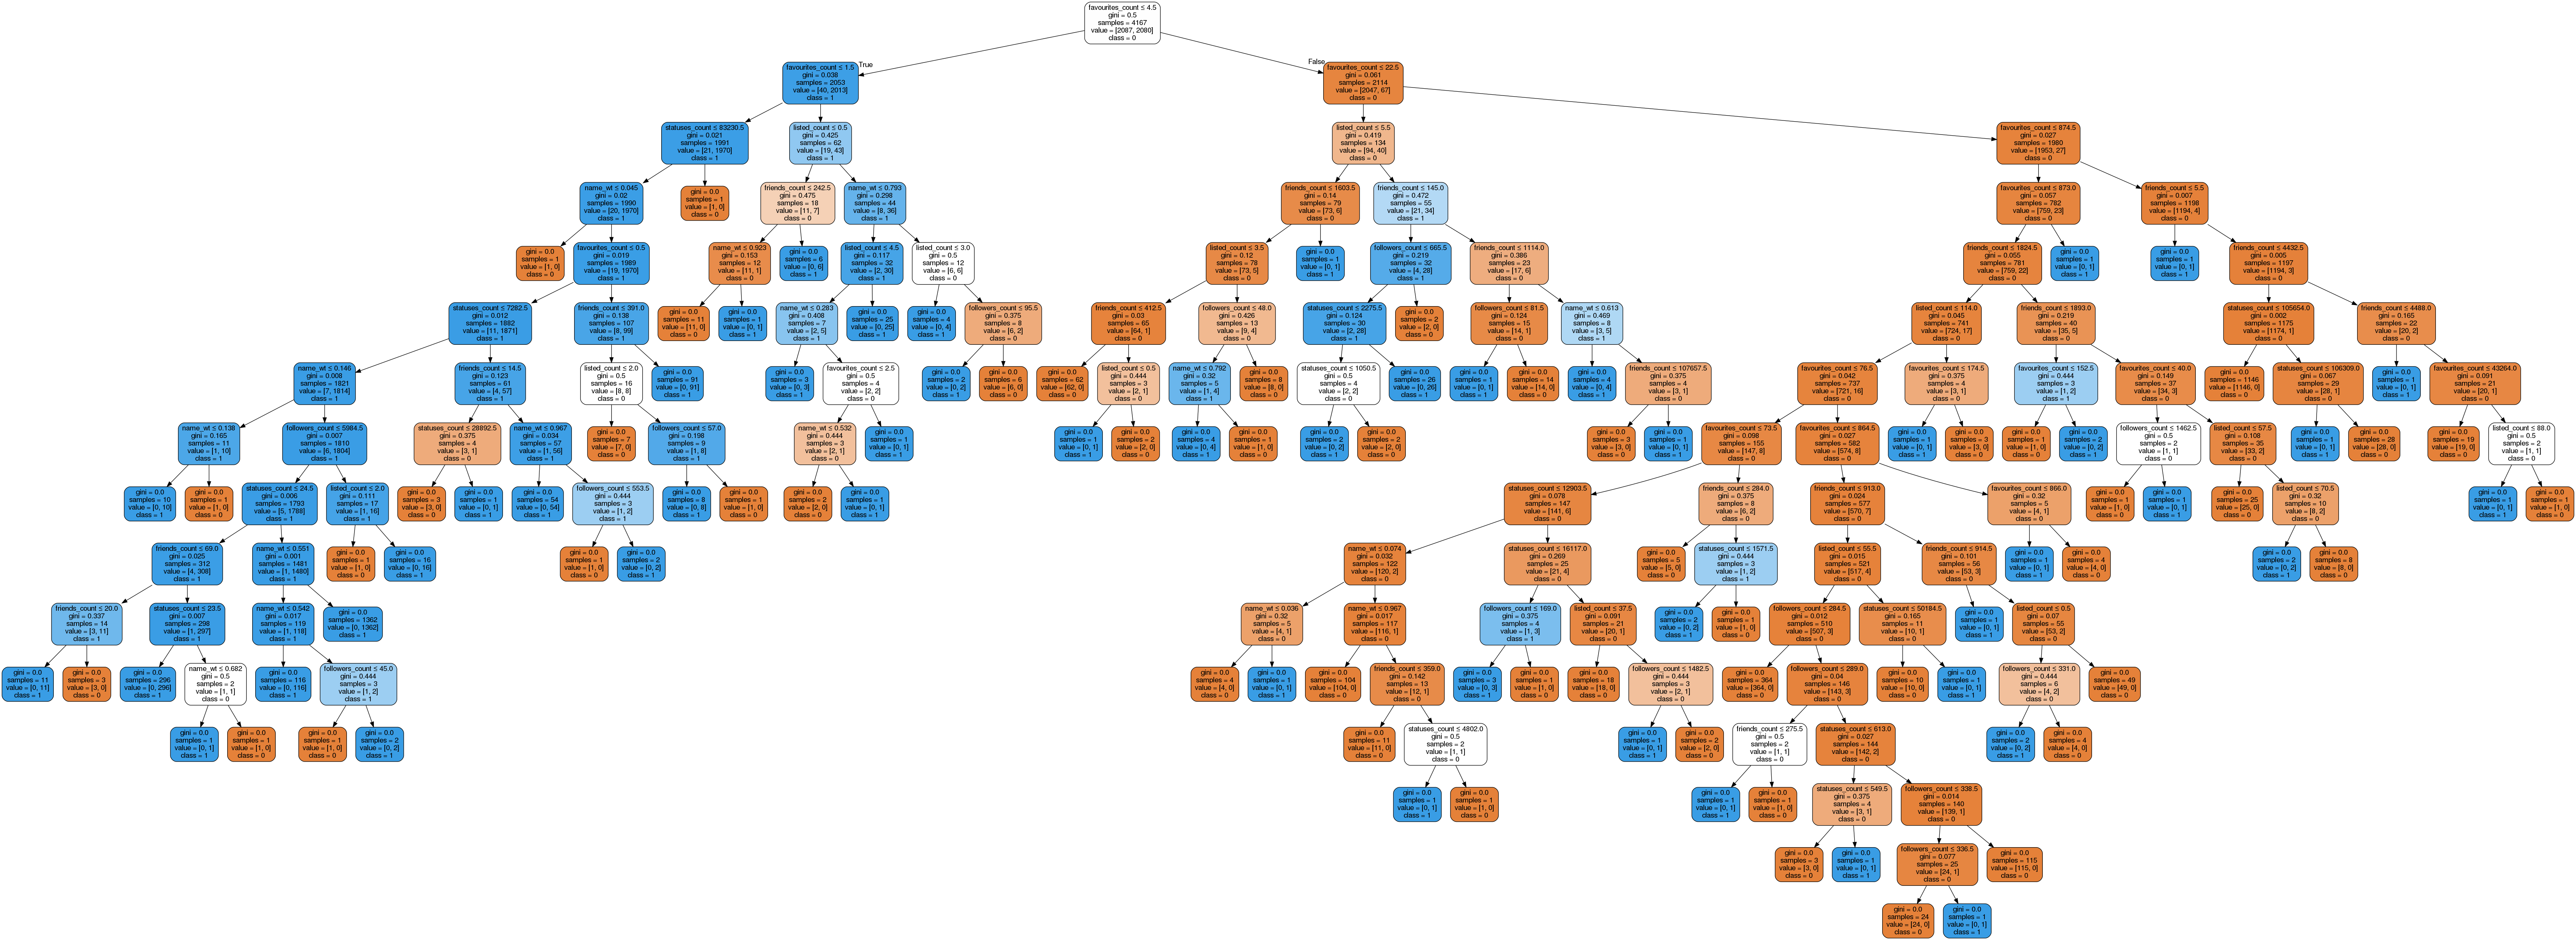

In [118]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('twitter.png')
Image(graph.create_png())
